<a href="https://colab.research.google.com/github/emanuel379/Econometria/blob/main/Econometrics_Methods_and_Applications_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install and load the readxl package
install.packages("readxl")
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Questions**

This exercise considers an example of data that do not satisfy all the standard assumptions of simple regression. In the considered case, one particular observation lies far off from the others, that is, it is an outlier. This violates assumptions A3 and A4, which state that all error terms εi are drawn from one and the same distribution with mean zero and fixed variance σ2. The dataset contains twenty weekly observations on sales and advertising of a
department store. The question of interest lies in estimating the effect of advertising on sales. One of the weeks was special, as the store was also open in the evenings during this week, but this aspect will first be ignored in the
analysis.

In [15]:
# Read the Excel file
data <- read_excel("TestExer1.xls")
data

Observation,Advertising,Sales
<dbl>,<dbl>,<dbl>
1,12,24
2,12,27
3,9,25
4,11,27
5,6,23
6,9,25
7,15,27
8,6,25
9,11,26


**(a)** Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you expect to find if you would fit a regression line to these data?

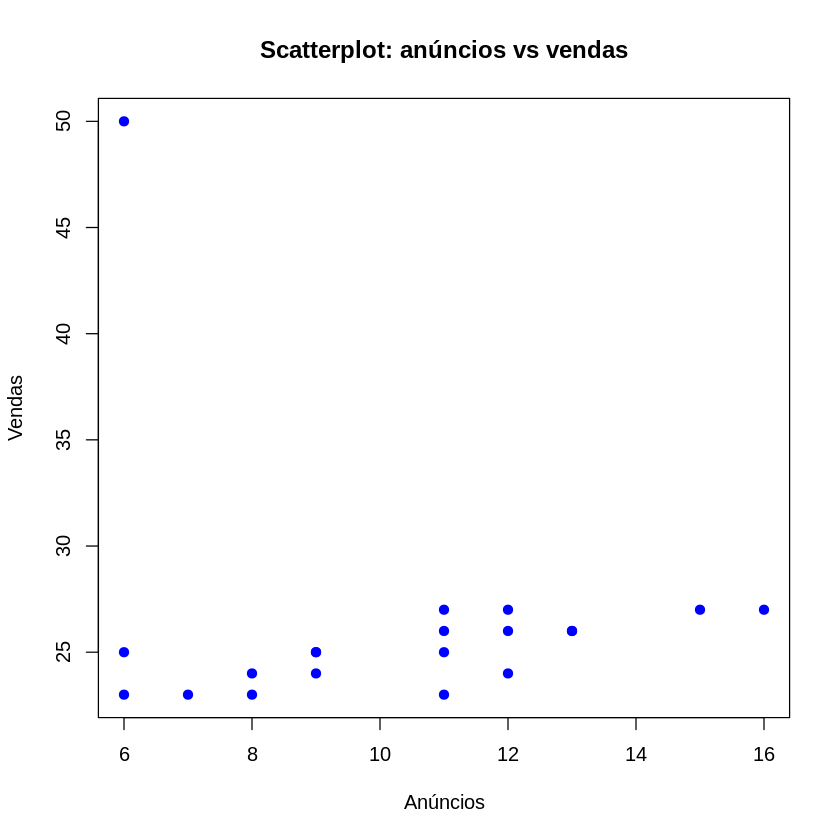

In [16]:
# Scatterplot despesas vs idade
# Scatter plot: Sales (Y) vs Advertising (X)
plot(data$Advertising, data$Sales,
     main = "Scatterplot: anúncios vs vendas",
     xlab = "Anúncios",
     ylab = "Vendas",
     pch = 19,       # Solid circle points
     col = "blue")   # Blue points

It probably wouldn't fit well because of an outlier in the data.

**(b)** Estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?

In [17]:
# Fit the regression model
model <- lm(Sales ~ Advertising, data = data)

# Summarize the model
summary(model)


Call:
lm(formula = Sales ~ Advertising, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6794 -2.7869 -1.3811  0.6803 22.3206 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.6269     4.8815   6.069 9.78e-06 ***
Advertising  -0.3246     0.4589  -0.707    0.488    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.836 on 18 degrees of freedom
Multiple R-squared:  0.02704,	Adjusted R-squared:  -0.02701 
F-statistic: 0.5002 on 1 and 18 DF,  p-value: 0.4885


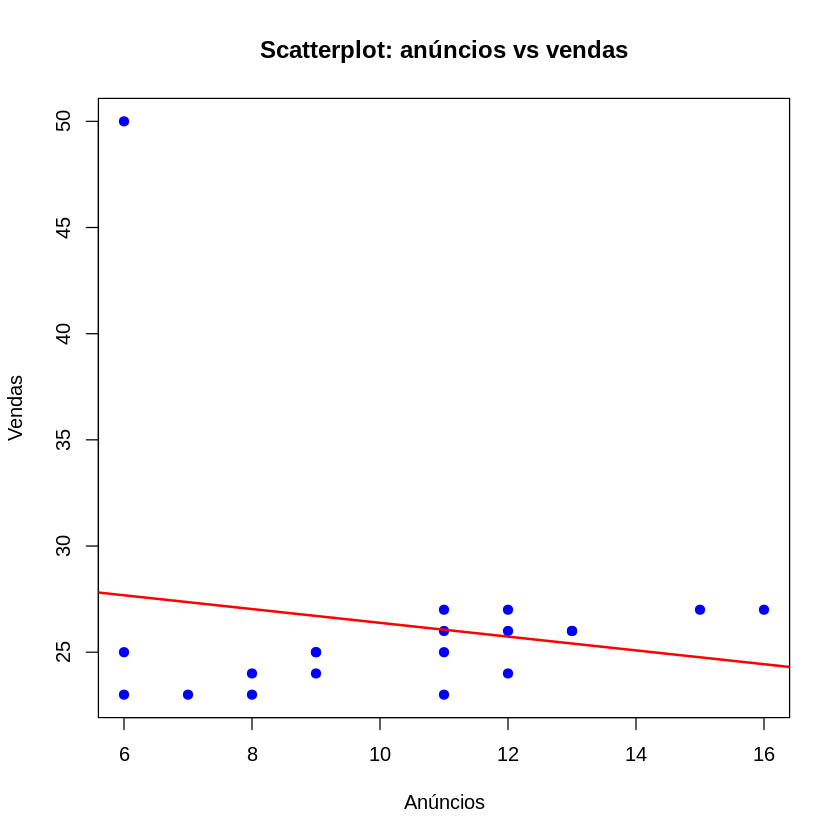

In [25]:
# Plot for graphic
plot(data$Advertising, data$Sales,
     main = "Scatterplot: anúncios vs vendas",
     xlab = "Anúncios",
     ylab = "Vendas",
     pch = 19,       # Solid circle points
     col = "blue")

# Add regression line
abline(model, col = "red", lwd = 2)

Yes, considering any given α, we reject the null hypothesis, thus concluding that b is significantly different from 0.

**(c)** Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this histogram?

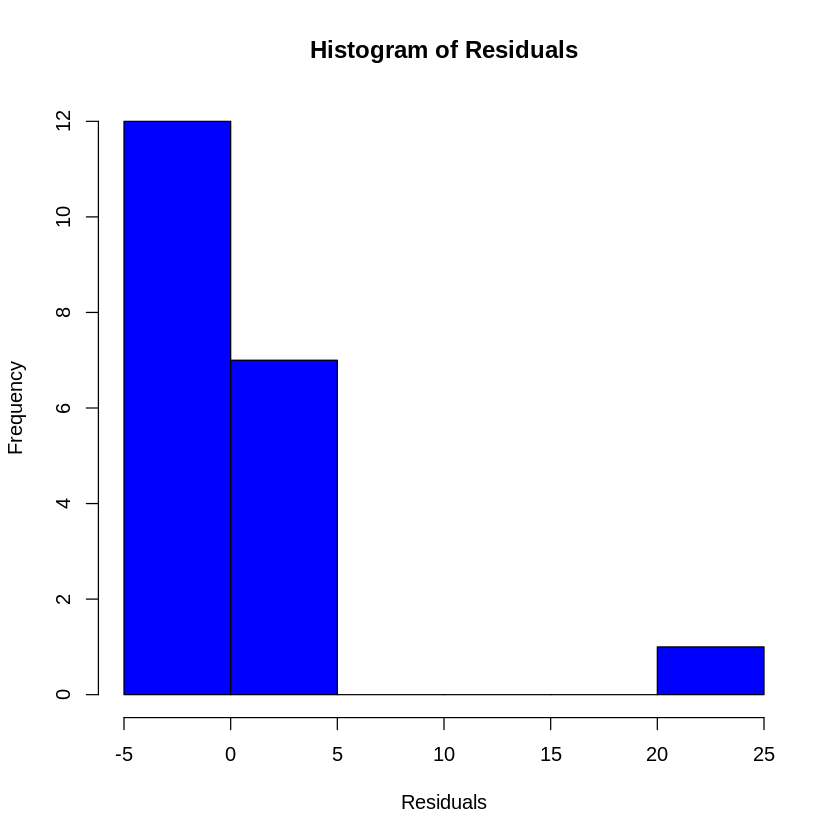

In [19]:
# Compute the residuals
residuals <- resid(model)

# Draw the histogram
hist(residuals, main = "Histogram of Residuals", xlab = "Residuals", ylab = "Frequency", col = "blue", border = "black")

It is reasonable to say that the residuals, apparently, don't follow a normal distribution.

**(d)** Apparently, the regression result of part (b) is not satisfactory. Once you realize that the large residual corresponds to the week with opening hours during the evening, how would you proceed to get a more satisfactory regression model?

I would drop this clearly unexpected outlier and perform the regression again.

In [20]:
# Exclude the observation where 'sales' is equal to 50
new_data <- subset(data, Sales != 50)

# View the new dataset
new_data

Observation,Advertising,Sales
<dbl>,<dbl>,<dbl>
1,12,24
2,12,27
3,9,25
4,11,27
5,6,23
6,9,25
7,15,27
8,6,25
9,11,26


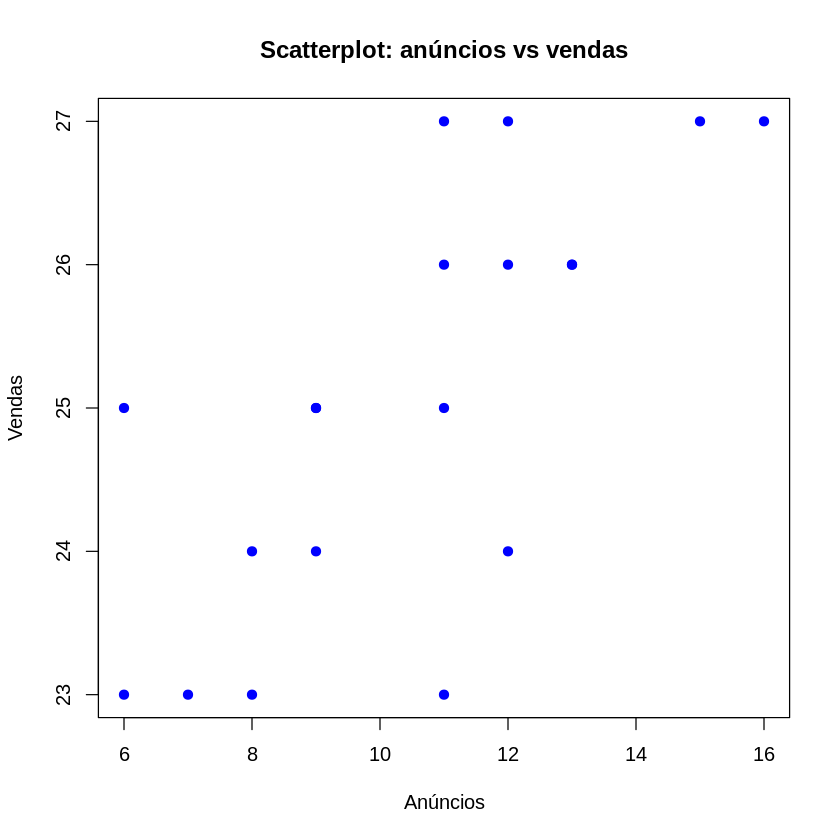

In [21]:
# Scatterplot despesas vs idade
# Scatter plot: Sales (Y) vs Advertising (X)
plot(new_data$Advertising, new_data$Sales,
     main = "Scatterplot: anúncios vs vendas",
     xlab = "Anúncios",
     ylab = "Vendas",
     pch = 19,       # Solid circle points
     col = "blue")   # Blue points

In [22]:
# Fit the regression model
model2 <- lm(Sales ~ Advertising, data = new_data)

# Summarize the model
summary(model2)


Call:
lm(formula = Sales ~ Advertising, data = new_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2500 -0.4375  0.0000  0.5000  1.7500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.1250     0.9548  22.124 5.72e-14 ***
Advertising   0.3750     0.0882   4.252 0.000538 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.054 on 17 degrees of freedom
Multiple R-squared:  0.5154,	Adjusted R-squared:  0.4869 
F-statistic: 18.08 on 1 and 17 DF,  p-value: 0.0005379


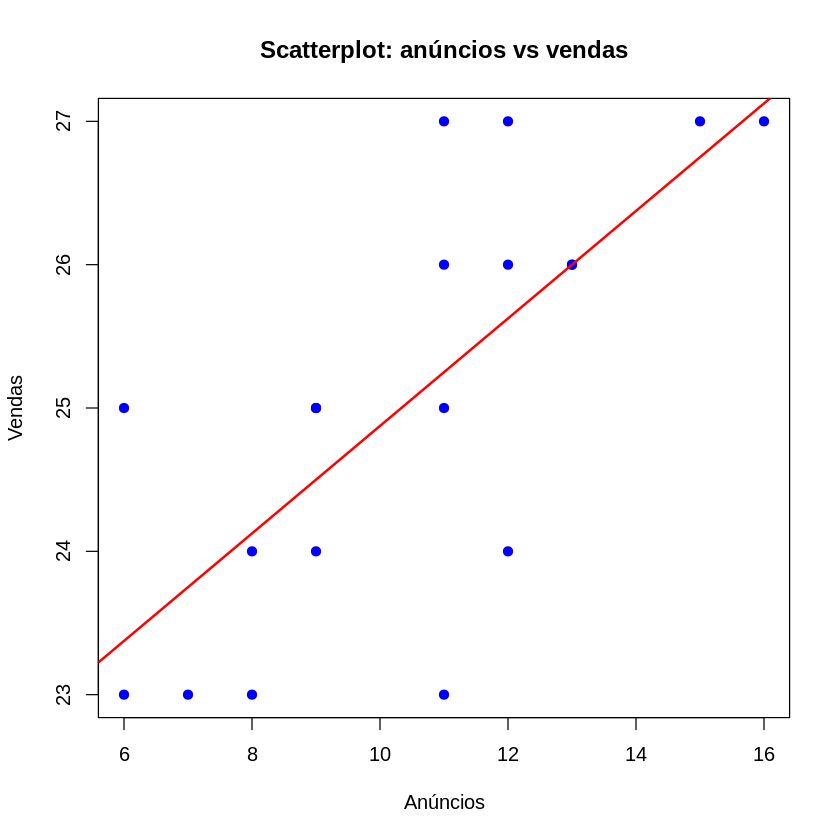

In [26]:
# Plot for graphic
plot(new_data$Advertising, new_data$Sales,
     main = "Scatterplot: anúncios vs vendas",
     xlab = "Anúncios",
     ylab = "Vendas",
     pch = 19,       # Solid circle points
     col = "blue")

# Add regression line
abline(model2, col = "red", lwd = 2)

Now, instead of a decreasing rend, we clearly observe that the two variables are positively correlated.

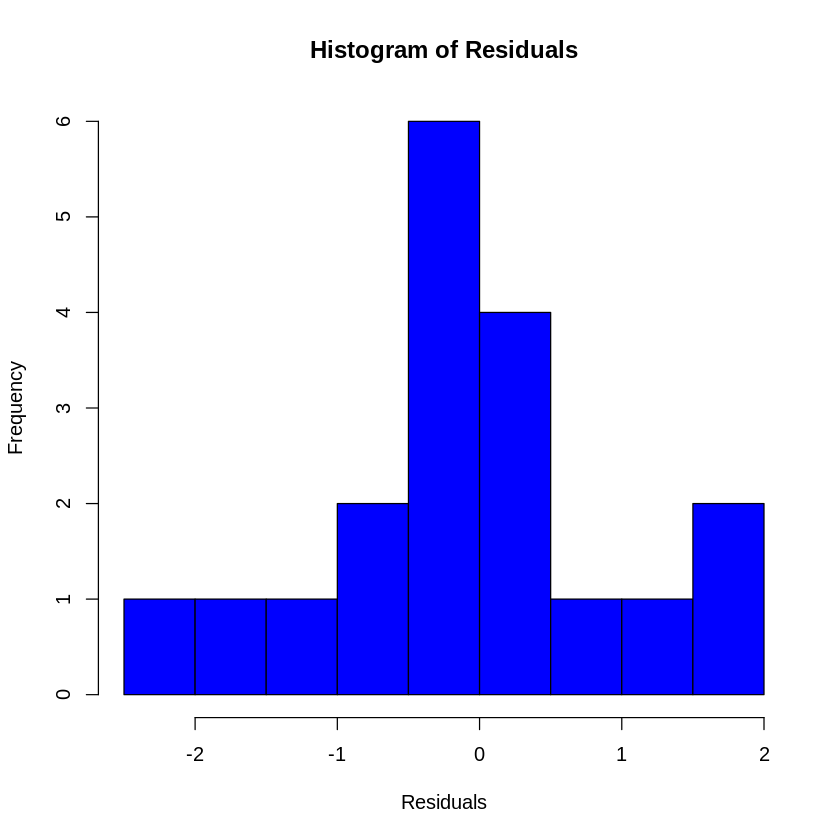

In [27]:
# Compute the residuals
residuals <- resid(model2)

# Draw the histogram
hist(residuals, main = "Histogram of Residuals", xlab = "Residuals", ylab = "Frequency", col = "blue", border = "black")

Now we see that the residuals are more like a gaussian distrivution, but we still see structural problems.

**(e)** Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?


In [28]:
# Printing the model again
# Fit the regression model
model2 <- lm(Sales ~ Advertising, data = new_data)

# Summarize the model
summary(model2)


Call:
lm(formula = Sales ~ Advertising, data = new_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2500 -0.4375  0.0000  0.5000  1.7500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.1250     0.9548  22.124 5.72e-14 ***
Advertising   0.3750     0.0882   4.252 0.000538 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.054 on 17 degrees of freedom
Multiple R-squared:  0.5154,	Adjusted R-squared:  0.4869 
F-statistic: 18.08 on 1 and 17 DF,  p-value: 0.0005379


Yes, as in the first model, for any given α, we reject the null hypothesis, thus concluding that b is significantly different from 0.

**(f)** Discuss the differences between your findings in parts (b) and (e). Describe in words what you have learned from these results

The values of b differ in direction for both models, in the first model it's a negativecoefficient and in the second one a positive one, changing the interpretation of the correlation between the variables.

This exercise was useful for the understanding that it is important to analyze data and the impect an outlier can have in the adjustment.